#### Q1. What is interpolation? Why is it used in image processing?

Solution:

Interpolation is a technique used to estimate new pixel values when an image is resized, rotated, or transformed. Since images consist of a grid of pixels, transformations can cause pixels to shift to non-integer positions (for example, between two existing pixels). Interpolation helps fill in these gaps by calculating appropriate pixel values for these new locations.


Interpolation is essential in image processing because when an image is resized, rotated, or warped, the pixel values may no longer align with the original grid. It helps determine the new pixel values, ensuring that the transformed image remains smooth and clear.
Here are some common uses of interpolation:

Resizing an Image:

Enlarging: When an image is scaled up, new pixels need to be added. Interpolation estimates their values by using nearby pixels.

Shrinking: When reducing an image’s size, multiple pixels are combined, and interpolation ensures the results remain smooth.

Rotating an Image: When an image is rotated, some pixels end up in positions that don't exist on the original grid. Interpolation estimates their values to maintain image quality.

#### Q2. Explain at least four interpolation methods used for image processing (computer vision).

Solution:

Some interpolation methods used for image processing (computer vision):

**1. Nearest-Neighbor Interpolation:**
This is the simplest method. It just picks the closest pixel and copies its value to the new location.
It’s super fast but makes images look blocky and pixelated when enlarged.
Great for things like segmenting objects in an image where colors don’t need to blend smoothly.

**2. Bilinear Interpolation:**
This method looks at the four closest pixels and takes an average of their values to create a smoother transition.
It makes the image look softer and less pixelated compared to nearest-neighbor, but sometimes it blurs fine details.
Commonly used in general image resizing when a balance between speed and quality is needed.

**3. Bicubic Interpolation:**
It’s like bilinear interpolation but smarter—it considers 16 neighboring pixels instead of just 4.
This gives sharper and more detailed results than bilinear, making it a popular choice for high-quality image scaling.
However, it’s a bit slower and can sometimes create slight ringing effects around sharp edges.

**4. Spline Interpolation:**
This method creates smooth curves between pixel values by adjusting how they connect.
It’s perfect for applications like medical imaging, where small details matter a lot.
However, it takes more time to compute compared to other methods.

**5. Gaussian Interpolation:**
This method smooths out pixel values using a Gaussian function (a type of blur).
It’s useful when reducing noise in an image while keeping important details.
Often used in facial recognition and object detection to remove unwanted variations.






#### Q3. Take an image, apply at least 10 geometric transformations and display all of the images in a single output.

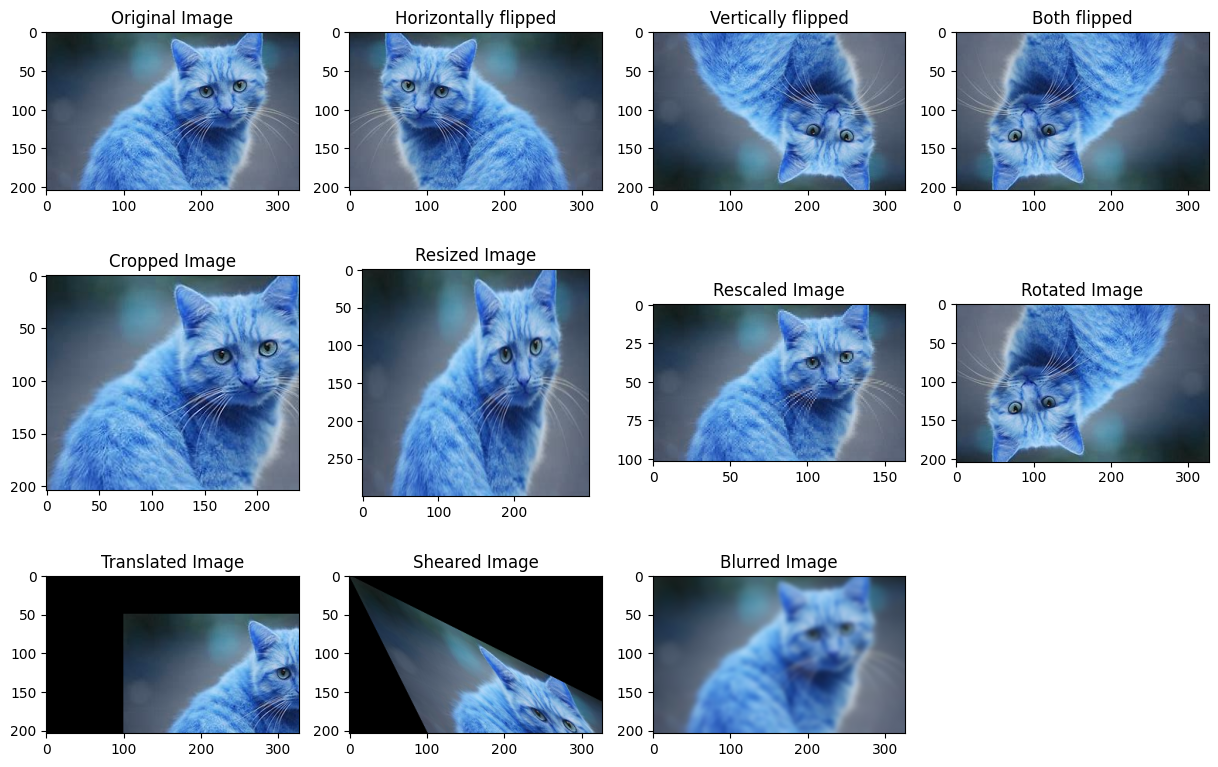

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/Image Folder/Cat.jpg')

# Flip the image
horizontal_flip = cv2.flip(image, 1)         # Horizontal flipping
vertical_flip = cv2.flip(image, 0)           # Vertical flipping
both_flip = cv2.flip(horizontal_flip, 0)     # Horizontal and vertical both flipping


(y_start, y_end, x_start, x_end) = (0, 204, 40, 280)
cropped_image = image[y_start:y_end, x_start:x_end]  # Image cropping


new_width = 300
new_height = 300
resized_img = cv2.resize(image, (new_width, new_height))  # Image resizing


rescaled_img = cv2.resize(image, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)  #Image Rescaling

rotated_image = cv2.rotate(image, cv2.ROTATE_180)   # Image Rotation


M_translation = np.float32([[1, 0, 100], [0, 1, 50]])
rows, cols = image.shape[:2]
translated_img = cv2.warpAffine(image, M_translation, (cols, rows))   # Translation (Shift Image)


M_shear = np.float32([[1, 0.5, 0], [0.5, 1, 0]])
rows, cols = image.shape[:2]
sheared_img = cv2.warpAffine(image, M_shear, (cols, rows))   # Shearing (Affine Transformation)


blurred_img = cv2.GaussianBlur(image, (15, 15), 0) # Gaussian Blur (Smoothing)


plt.figure(figsize=(15, 10))
plt.subplot(3, 4, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(3, 4, 2)
plt.imshow(horizontal_flip)
plt.title('Horizontally flipped')

plt.subplot(3, 4, 3)
plt.imshow(vertical_flip)
plt.title('Vertically flipped')

plt.subplot(3, 4, 4)
plt.imshow(both_flip)
plt.title('Both flipped')

plt.subplot(3, 4, 5)
plt.imshow(cropped_image)
plt.title('Cropped Image')

plt.subplot(3, 4, 6)
plt.imshow(resized_img)
plt.title('Resized Image')

plt.subplot(3, 4, 7)
plt.imshow(rescaled_img)
plt.title('Rescaled Image')

plt.subplot(3, 4, 8)
plt.imshow(rotated_image)
plt.title('Rotated Image')

plt.subplot(3, 4, 9)
plt.imshow(translated_img)
plt.title('Translated Image')

plt.subplot(3, 4, 10)
plt.imshow(sheared_img)
plt.title('Sheared Image')

plt.subplot(3, 4, 11)
plt.imshow(blurred_img)
plt.title('Blurred Image')



plt.show()


#### Q4. Plot a 2x2 grid with original, three resized images with different interpolation methods.

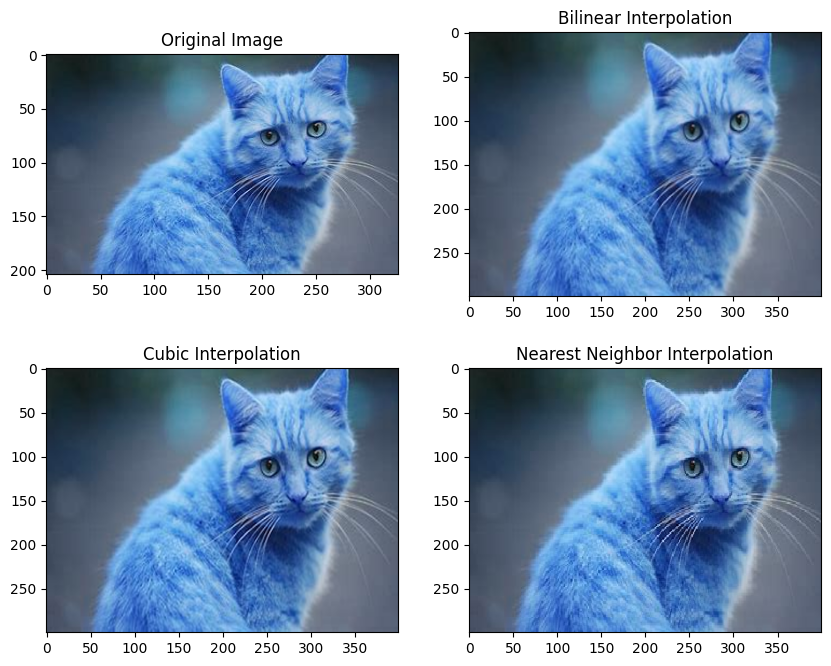

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Image Folder/Cat.jpg')

# Resize the image using different interpolation methods
resized_linear = cv2.resize(image, (400, 300), interpolation=cv2.INTER_LINEAR)  # Bilinear interpolation
resized_cubic = cv2.resize(image, (400, 300), interpolation=cv2.INTER_CUBIC)    # Cubic interpolation
resized_nearest = cv2.resize(image, (400, 300), interpolation=cv2.INTER_NEAREST)  # Nearest neighbor interpolation

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(resized_linear)
plt.title('Bilinear Interpolation')

plt.subplot(2, 2, 3)
plt.imshow(resized_cubic)
plt.title('Cubic Interpolation')

plt.subplot(2, 2, 4)
plt.imshow(resized_nearest)
plt.title('Nearest Neighbor Interpolation')

plt.show()
